### importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Processing the training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/solar eclipse classification/dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2214 images belonging to 3 classes.


### Processing the test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/solar eclipse classification/dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 632 images belonging to 3 classes.


In [5]:
training_set.class_indices

{'Annular_solar_eclipse': 0,
 'Partial_solar_eclipse': 1,
 'Total_solar_eclipse': 2}

### Build the CNN

In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

### Training the CNN

In [7]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

#### Training the CNN on the training set and evaluating it on test set

In [8]:
fitted_model = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
70/70 [==============================] - 626s 9s/step - loss: 0.9939 - accuracy: 0.4679 - val_loss: 0.6811 - val_accuracy: 0.7326
Epoch 2/25
70/70 [==============================] - 19s 264ms/step - loss: 0.5917 - accuracy: 0.7620 - val_loss: 0.5782 - val_accuracy: 0.7247
Epoch 3/25
70/70 [==============================] - 18s 261ms/step - loss: 0.4150 - accuracy: 0.8455 - val_loss: 0.2357 - val_accuracy: 0.9177
Epoch 4/25
70/70 [==============================] - 18s 261ms/step - loss: 0.2213 - accuracy: 0.9160 - val_loss: 0.2124 - val_accuracy: 0.9225
Epoch 5/25
70/70 [==============================] - 18s 258ms/step - loss: 0.1456 - accuracy: 0.9517 - val_loss: 0.0695 - val_accuracy: 0.9715
Epoch 6/25
70/70 [==============================] - 19s 265ms/step - loss: 0.1517 - accuracy: 0.9472 - val_loss: 0.1422 - val_accuracy: 0.9541
Epoch 7/25
70/70 [==============================] - 19s 263ms/step - loss: 0.0450 - accuracy: 0.9842 - val_loss: 0.1896 - val_accuracy: 0.9557
E

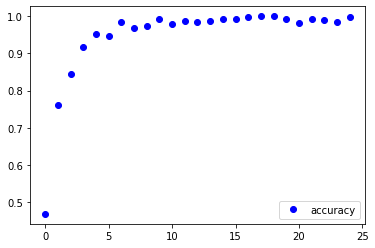

In [9]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')

plt.legend()

### Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/solar eclipse classification/samples/ASE.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices